In [8]:
#Marathon Results Analysis - Boston 2017 from Kaggle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
plt.style.use('fivethirtyeight')
from subprocess import check_output
print(check_output(["ls", "../Module_4"]).decode("utf8"))
df = pd.read_csv('../Module_4/marathon_results_2017.csv')

Module_4_Visualisation.ipynb
marathon_results_2017.csv



In [5]:
#Function converting string (HH:MM:SS into Minutes)
def time_to_min(string):
#Convert Time format into Minutes    
    if string != '-':
        time_segments = string.split(':')
        hours = int(time_segments[0])
        mins = int(time_segments[1])
        sec = int(time_segments[2])
        time = hours*60 + mins + np.true_divide(sec,60)
        return time
    else:
        return -1
#Print Minutes of Half(21.05) and Full(42.1) for Top Finisher
print(time_to_min(df.loc[1,'Half']))
print(time_to_min(df.loc[1,'Official Time']))

64.58333333333333
129.96666666666667


Text(0.5, 1.0, 'Distribution of Split (Split < 1.0 means 1st half time is shorter)')

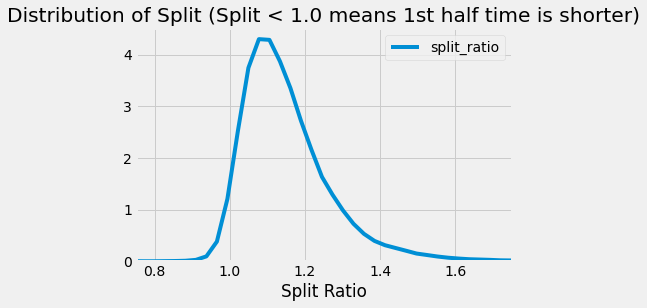

In [13]:
#Compare First Half against the Next Half
#Split Ratio Performance
df['Half_min'] = df.Half.apply(lambda x: time_to_min(x))
df['Full_min'] = df['Official Time'].apply(lambda x: time_to_min(x))
df['split_ratio'] = (df['Full_min'] - df['Half_min'])/(df['Half_min'])
df_split = df[df.Half_min > 0]
#Kernel Density Estimate is most commonly used for Probability Density
sns.kdeplot(df_split.split_ratio)
#Trial and error of capturing the min/max range
plt.xlim([0.75,1.75])
plt.xlabel('Split Ratio')
#Negative Split or below 1 means 1st half time us shorter than
plt.title('Distribution of Split (Split < 1.0 means 1st half time is shorter)')
#As expected most Runners would be faster on 1st half and would have longer timings on the finishing half 

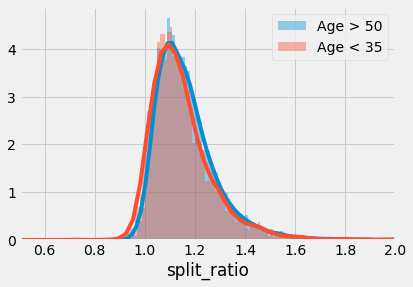

In [11]:
#Comparison by Age

sns.distplot(df_split.split_ratio[df_split.Age >50],np.arange(0.6,3,0.01))
sns.distplot(df_split.split_ratio[df_split.Age <35],np.arange(0.6,3,0.01))
plt.xlim([0.5,2])
plt.legend(['Age > 50', 'Age < 35'])

#Surprisingly there's not much difference in the split distribution between younger and older runners

(0.5, 2.0)

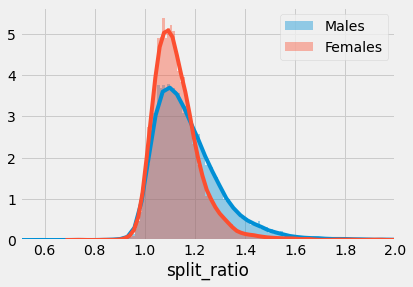

In [12]:
#Comparison by Gender

sns.distplot(df_split.split_ratio[df_split['M/F'] == 'M'], np.arange(0.6,3,0.01))
sns.distplot(df_split.split_ratio[df_split['M/F'] == 'F'],np.arange(0.6,3,0.01))
plt.legend(['Males','Females'])
plt.xlim([0.5,2])

#There's a bit of disparity by Gender, it seems Females 

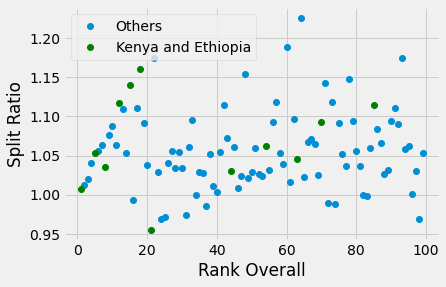

In [16]:
plt.plot(df_split.Overall[(df_split.Country != 'ETH') & (df_split.Country != 'KEN') & (df_split.Overall<100)], df_split.split_ratio[(df_split.Country != 'ETH') & (df_split.Country != 'KEN') & (df_split.Overall<100)],'o')
plt.plot(df_split.Overall[(df_split.Country == 'ETH') & (df_split.Overall<100)], df_split.split_ratio[(df_split.Country == 'ETH')  & (df_split.Overall<100)],'o', color = 'g')
plt.plot(df_split.Overall[(df_split.Country == 'KEN') & (df_split.Overall<100)], df_split.split_ratio[(df_split.Country == 'KEN')  & (df_split.Overall<100)],'o', color = 'g')
plt.xlabel('Rank Overall')
plt.ylabel('Split Ratio')
plt.legend(['Others','Kenya and Ethiopia'])

#Not sure what happen in 2017 but it seems that only a few splits were below 1.0 from the top elite runners


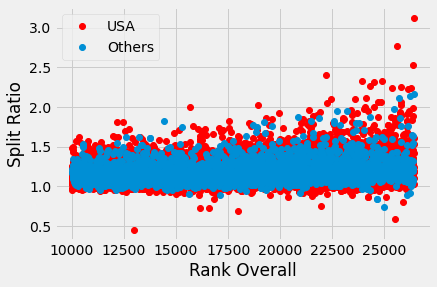

In [19]:
#Let's see for those who are ranked 10000 and above and compare the splits of the American participants vs others
plt.plot(df_split.Overall[(df_split.Country == 'USA') & (df_split.Overall>10000)], df_split.split_ratio[(df_split.Country == 'USA')  & (df_split.Overall>10000)],'o', color = 'r')
plt.plot(df_split.Overall[(df_split.Country != 'USA') & (df_split.Overall>10000)], df_split.split_ratio[(df_split.Country != 'USA') & (df_split.Overall>10000)],'o')

plt.xlabel('Rank Overall')
plt.ylabel('Split Ratio')
plt.legend(['USA','Others'])
